In [5]:
import numpy as np
import pandas as pd
import seaborn as sns; sns.set()

# Prepare Data

In [150]:
data = pd.read_csv('dataset/iris.csv', header = None)
rawClass = data[data.columns[-1]].unique()
data = data.replace({j: i for (i, j) in enumerate(rawClass)}) #convert str class to number

X = data[data.columns[:-1]].astype(float)
y = data[data.columns[-1:]].astype(int)

_y = y.values.flatten()
y_oneHot = np.zeros((_y.size, _y.max()+1))
y_oneHot[np.arange(_y.size), _y] = 1 #convert dec number class to oneHot
y_oneHot

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [61]:
data = pd.DataFrame(np.concatenate([X, y], axis=1), 
                    columns = [
                        "petal length", 
                        "petal width", 
                        "sepal length", 
                        "sepal width", 
                        "class"
                    ])
data

,petal length,petal width,sepal length,sepal width,class
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


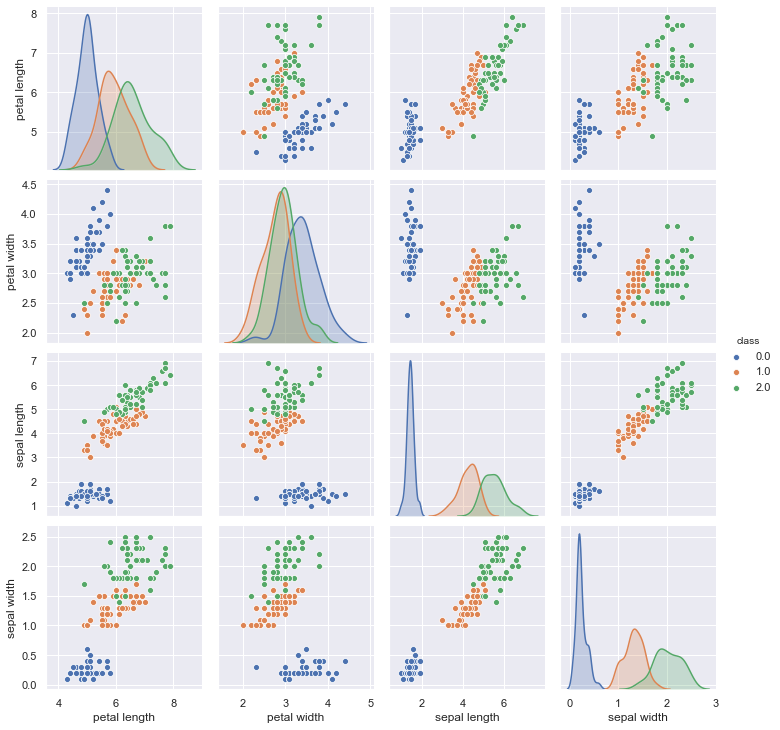

In [62]:
sns.pairplot(data=data, hue="class")

In [63]:
X.head() #input = 4 ,output = 3(3 class)

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Nueral Network

In [159]:
sigmoid = lambda x: 1. / (1. + np.exp(-x)) # make in non-linear, for hidden layer
softmax = lambda x: np.exp(x) / np.sum(np.exp(x), axis=1, keepdims = True) # for output layer
# random str of binary for connection weights
random_indv = lambda size: "".join([str((np.random.random()>.5) + 0) for i in range(28 * size)]) 
# size = number of connection weight bits
# 28 = number of connection weights
# 28 = (hidden layer : 4*4) + (output layer 4*3)
decode = lambda x, size: (int(x, 2) / (2**size - 1)) * 2 - 1 # decode binary to dec
predict = lambda X, w1, w2: softmax(sigmoid(X.values.dot(w1)).dot(w2)) # predict output
CE = lambda y, h: np.mean(- y * np.log(h) - (1 - y) * np.log(1 - h)) # loss

def decode_weight(binary, size):
    '''convert binary to martix of connection weight for hidden and output layer'''
    w = np.array([decode(binary[i: i + size], size) for i in range(0, len(binary), size)])
    w1 = w[:16].reshape([4, 4]) # hidden
    w2 = w[16:].reshape([4, 3]) # output
    return w1, w2

# Genetic Algorithm

Stochastic Universal Sampling Selection

In [172]:
def stochastic_universal(fitness, popSize):
    sum_f = np.sum(fitness)
    mean_f = sum_f / popSize
    pointer = np.random.random() * mean_f
    
    cum_f = [np.sum(fitness[:i+1]) for i in range(len(fitness))] 
    cum_f[:0] = [0]
    cum_f = np.array(cum_f) # cumerative fitness
    
    selected = set()
    
    for i in range(popSize // 2):
        pn = np.where((pointer > cum_f[:-1]) & (pointer < cum_f[1:]))[0]
        if len(pn) > 0:
            selected.add(pn[0])
        pointer += mean_f
        
    return list(selected)

crossover

In [183]:
def crossover(parents):
    '''One-Point Crossover'''
    parents = list(parents)
    offspring = []
    while len(parents) > 1:
        p0, p1 = [parents.pop(np.random.randint(0, len(parents))) for i in range(2)]
        pointer = np.random.randint(0, len(p0))
        of0, of1 = p0[:pointer] + p1[pointer:], p1[:pointer] + p0[pointer:]
        offspring.extend([of0,of1])
        
    return offspring

genatic algorithm

In [131]:
popSize = 1000
generation = 1000
best_select = 5
ind_size = 8

In [188]:
pop = [random_indv(ind_size) for i in range(popSize)]
pop[:5]

['10111010100010111011000011100100010011111111000111111001001111010001010000000111000101110010111111010111101011011000100000100010010010110001001110000011101100111010011011100001101110111111110001110011101110011011011110011100',
 '01010000010101111110000011000101000010100101011101001010111101001111000111000101011111010111001110101010001101010010000001111011101011101101010101011111011100010011110011111010001110010000101101110001011111100111100100111111',
 '01100011111010001110011001001010011101000010000001100111110001101011111101111111011110111010011101011011000010000111100101110100000100110000011001011110100111001011111011110100100000011111000000100111001010111001000001111000',
 '00101111101000000110110101111110011010101100000001001100100100001001100010000011100110101010000000100001000011110111110010000001010111000110101101011010001100011010100110111000111001000000000010100110111000001000001111110010',
 '1001011010001111101101110110100000110000101100110001111100110001100111100111000000

In [191]:
def genetic_alforithm(popSize, generation, best_select, ind_size):
    pop = [random_indv(ind_size) for i in range(popSize)]
    
    for gen in range(generation):
        weights = [decode_weight(x, ind_size) for x in pop]
        outs = [predict(X, *w) for w in weights]
        losses = [CE(y_oneHot, o) for o in outs]
        max_loss = np.max(losses)
        fitness = [max_loss - loss for loss in losses]
        selected = stochastic_universal(fitness, popSize)
        parents = list(np.array(pop)[selected])
        best = []
        _pop = list(pop)
        for i in range(best_select):
            sel = np.argmax(fitness)
            fitness.pop(sel)
            best.append(_pop.pop(sel)) # add best parent to next gen
        offsprings = crossover(parents)
        offsprings.extend(best)
        offsprings.extend([random_indv(ind_size) for i in range(popSize - len(offsprings))]) #generate next generation
        pop = offsprings # next generation
        print(min(losses))
        
    return best[0]

best_pop = genetic_alforithm(popSize, generation, best_select, ind_size)

0.5179591401681738
0.5179591401681738
0.5179591401681738
0.5179591401681738
0.49104695162971057
0.4897620207620397
0.4897620207620397
0.4897620207620397
0.48975903678092675
0.48975903678092675
0.48975903678092675
0.48975903678092675
0.48975903678092675
0.48975903678092675
0.48975903678092675
0.48975903678092675
0.4896710649145527
0.48966753155106846
0.48966753155106846
0.48966753155106846
0.48966753155106846
0.48966753155106846
0.48966753155106846
0.48966753155106846
0.48966753155106846
0.48966753155106846
0.48966753155106846
0.4856607217277312
0.4856607217277312
0.4856607217277312
0.4856607217277312
0.4856607217277312
0.4856607217277312
0.4856607217277312
0.4856607217277312
0.4856607217277312
0.48526721042758464
0.48526721042758464
0.48097323654535795
0.48097323654535795
0.48097323654535795
0.48097323654535795
0.48097323654535795
0.48097323654535795
0.48097323654535795
0.48097323654535795
0.48097323654535795
0.48097323654535795
0.48097323654535795
0.48089822602506566
0.480349953487046

In [197]:
sol = decode_weight(best_pop, ind_size)
np.argmax(predict(X, *sol), axis = 1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1,
       2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])